<a href="https://colab.research.google.com/github/Liz3tha/DRSP-RAINFALL-PROJECT/blob/main/DSRP_PREDICT_RAIN_IN_AUSTRALIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question
Which weather features (columns) combined are most predictive of whether it rains the next day in Australia (across the different regions, no matter the time of year)

# Info on rows

Date: The date of the observation.

Location: The weather station of the observation.

MinTemp: Minimum temperature on the day of the observation.

MaxTemp: Maximum temperature on the day of the observation.

Rainfall: Recorded rainfall, in mm, on the day of the observation.

Evaporation: The observed (class A) pan evaporation in the 24 hours to 9am that day.

Sunshine: Number of hours of bright sunshine observed that day.

WindGustDir: Direction of the strongest wind gust observed in the 24 hours to midnight that day.

WindGustSpeed: Speed, in km/h, of the strongest wind gust observed in the 24 hours to midnight of that day.

WindDir9am: Observed wind direction at 9am.

WindDir3pm: Observed wind direction at 3pm.

WindSpeed9am: Wind speed, in km/h, averaged over 10 minutes prior to 9am.

WindSpeed3pm: Wind speed, in km/h, averaged over 10 minutes prior to 3pm.

Humidity9am: Percent humidity at 9am.

Humidity3pm: Percent humidity at 3pm.

Pressure9am: Atmospheric pressure, in millibars, at 9am.

Pressure3pm: Atmospheric pressure, in millibars, at 3pm.

Cloud9am: Fraction of sky covered by clouds at 9am, measured in “oktas” (1 okta = ⅛ cloud cover; 4 oktas = 4/8 = ½ cloud cover, etc).

Cloud3pm: Fraction of sky covered by clouds at 3pm, measured in oktas.

Temp9am: Temperature, in degrees Celsius, at 9am.

Temp3pm: Temperature, in degrees Celsius, at 3pm.

RainToday: Either ‘Yes’ or ‘No’ for whether or not rain was observed on the day of the observation.

RainTomorrow: Either ‘Yes’ or ‘No’ for whether or not rain was observed on the next day after the row’s observation.


# Importing the data and basic functions


In [ ]:
!pip install fix_yahoo_finance
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv', encoding='latin-1')

df.info()

  Preparing metadata (setup.py) ... done
  Created wheel for fix_yahoo_finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7071 sha256=6da8b4f9fdd2b1267e73e3569ef9a73af653fd2adbb7602e3014216da22fdff5
  Stored in directory: /root/.cache/pip/wheels/6d/7e/b6/6d0901b57b82e1c50b8e0527c664be867df7411cc2acb6cfea
Successfully built fix_yahoo_finance


In [ ]:
df.head()

In [ ]:
df.describe()

# Data cleaning (basic)

In [ ]:
print(df.isnull().sum())

In [ ]:
# encoding RainToday
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
# encoding Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
# Dropping data from before 2013
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2014-01-01']


In [ ]:
plt.figure(figsize=(16,8))
avg_rain = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)[:20]
sns.barplot(x=avg_rain.index, y=avg_rain.values)
plt.title("Top 20 Locations by Average Rainfall")
plt.xticks(rotation=90)
plt.ylabel("Average Rainfall (mm)")
plt.show()

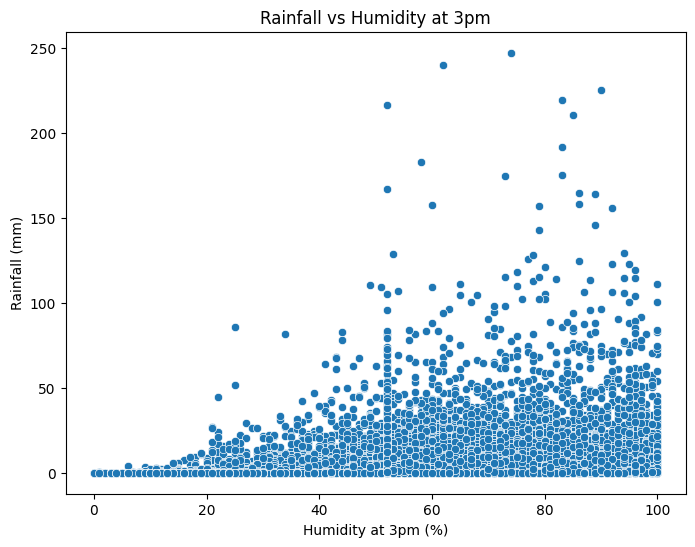

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Humidity3pm', y='Rainfall', data=df)
plt.title("Rainfall vs Humidity at 3pm")
plt.xlabel("Humidity at 3pm (%)")
plt.ylabel("Rainfall (mm)")
plt.show()

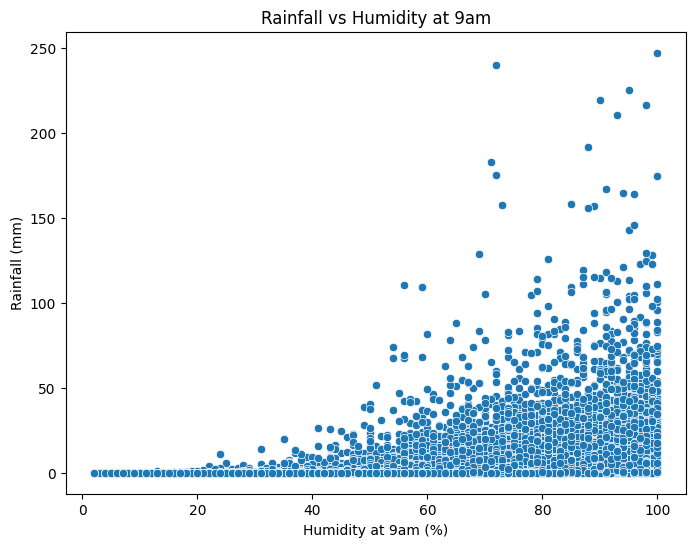

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Humidity9am', y='Rainfall', data=df)
plt.title("Rainfall vs Humidity at 9am")
plt.xlabel("Humidity at 9am (%)")
plt.ylabel("Rainfall (mm)")
plt.show()

In [ ]:
df = df.drop_duplicates()
#print(df.isnull().sum())


# Drop rows or fill in missing values (filled with median)
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
#Wind gust direction,  has null values but they are strings
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())


df.isnull().sum()

df.info()






In [ ]:
df.head()

In [ ]:
corr= df.select_dtypes('number').corr()


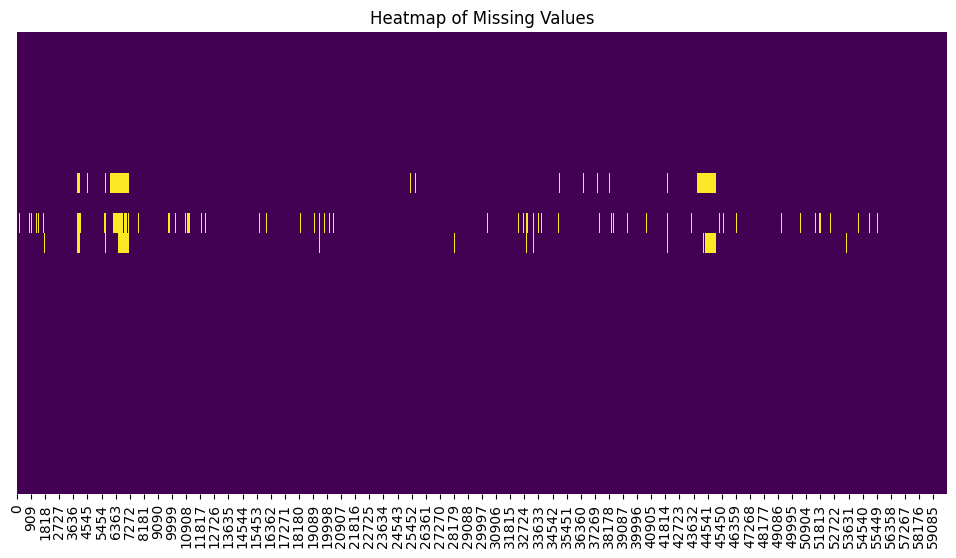

In [34]:
#Heatmap of missing values (Seaborn)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis', yticklabels=False)
plt.title ("Heatmap of Missing Values")
plt.show()

In [ ]:
#Bar plot of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    plt.figure(figsize=(10,5))
    missing_counts.sort_values(ascending=False).plot(kind='bar')
    plt.ylabel("Number of Missing Values")
    plt.title("Missing Values Per Column")
    plt.show()
else:
    print("No missing values found in the dataframe.")


# Drop rows with NaN in RainToday or RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Optional: reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Check to confirm it's clean
print(df[['RainToday', 'RainTomorrow']].isnull().sum())

In [ ]:
# Linear model
# linear_model = LinearRegression ()
# linear_model.fit(days, values)
# # Polynomial model
# (degree 2)
# poly_model =
# make_pipeline(Polynomi alFeatures(degree=2),
# LinearRegression))
# poly_model.fit (days, values)
#THIS IS FOR LATER!

In [ ]:
corr.style.background_gradient(cmap= 'coolwarm')

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:

columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']

# New df js with none strings
new_df = df.drop(columns=columns_to_drop)
print(new_df.head())



array([[<Axes: xlabel='Sunshine', ylabel='Sunshine'>,
        <Axes: xlabel='Cloud3pm', ylabel='Sunshine'>,
        <Axes: xlabel='Humidity3pm', ylabel='Sunshine'>,
        <Axes: xlabel='Pressure9am', ylabel='Sunshine'>,
        <Axes: xlabel='MinTemp', ylabel='Sunshine'>,
        <Axes: xlabel='MaxTemp', ylabel='Sunshine'>,
        <Axes: xlabel='RainToday', ylabel='Sunshine'>,
        <Axes: xlabel='RainTomorrow', ylabel='Sunshine'>],
       [<Axes: xlabel='Sunshine', ylabel='Cloud3pm'>,
        <Axes: xlabel='Cloud3pm', ylabel='Cloud3pm'>,
        <Axes: xlabel='Humidity3pm', ylabel='Cloud3pm'>,
        <Axes: xlabel='Pressure9am', ylabel='Cloud3pm'>,
        <Axes: xlabel='MinTemp', ylabel='Cloud3pm'>,
        <Axes: xlabel='MaxTemp', ylabel='Cloud3pm'>,
        <Axes: xlabel='RainToday', ylabel='Cloud3pm'>,
        <Axes: xlabel='RainTomorrow', ylabel='Cloud3pm'>],
       [<Axes: xlabel='Sunshine', ylabel='Humidity3pm'>,
        <Axes: xlabel='Cloud3pm', ylabel='Humidity3pm'>,
  

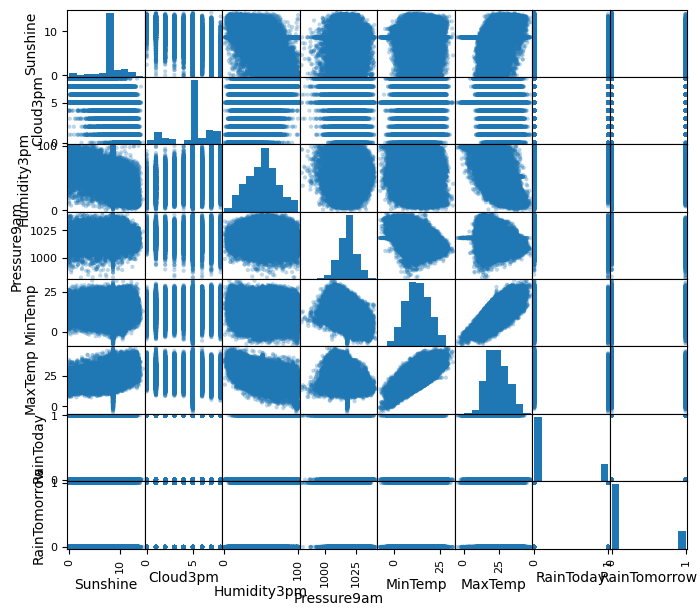

In [ ]:
columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am']
new_df = df.drop(columns=columns_to_drop)

from pandas.plotting import scatter_matrix
#below is the first attempt at graphing, very messy
#scatter_matrix(new_df, figsize= (16,12),alpha=0.3)

selectedC = ['Sunshine', 'Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow']

#New dataframe with variables that interest me
focused_df = new_df[selectedC]

# GRAPHIN NEW PLOTS
from pandas.plotting import scatter_matrix
scatter_matrix(focused_df, figsize=(8, 7), alpha=0.3)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2014-01-01,Albury,12.0,27.4,0.0,5.2,8.6,WNW,43.0,SSE,...,56.0,38.0,1011.1,1008.6,6.0,1.0,20.3,25.9,0.0,0.0
1,2014-01-02,Albury,16.7,27.7,0.0,5.2,8.6,W,31.0,WNW,...,61.0,22.0,1006.1,1005.8,1.0,1.0,22.3,26.4,0.0,0.0
2,2014-01-03,Albury,18.9,30.6,0.2,5.2,8.6,WSW,44.0,ENE,...,40.0,32.0,1003.1,999.1,8.0,8.0,22.3,27.5,0.0,0.0
3,2014-01-04,Albury,13.1,25.6,0.0,5.2,8.6,W,46.0,WSW,...,46.0,28.0,1006.8,1005.7,6.0,4.0,16.8,24.2,0.0,0.0
4,2014-01-05,Albury,8.4,29.4,0.0,5.2,8.6,WNW,65.0,SE,...,50.0,24.0,1009.4,1004.5,6.0,1.0,18.7,28.9,0.0,0.0


In [40]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['MaxTemp'], df['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,-2.6411,0.0,-2.7822,-2.5,True


# Null Hypothesis: Temp3pm has no effect on whether or not it will rain tomorrow. (RainTomorrow)

In [49]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['RainToday'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,0.298,0.0,0.2904,0.3057,True


In [37]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['Pressure9am'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,21.2956,0.0,20.9322,21.6591,True


In [50]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['Sunshine'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,-1.6363,0.0,-1.6824,-1.5903,True


In [54]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['Cloud3pm'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,1.3589,0.0,1.32,1.3978,True


In [53]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['MinTemp'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,1.3072,0.0,1.1816,1.4328,True


In [52]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['MaxTemp'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,-2.6411,0.0,-2.7822,-2.5,True


In [51]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_new_copy['RainTomorrow'], df_new_copy['RainTomorrow'])
comp.tukeyhsd().summary()


/usr/local/lib/python3.11/dist-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,1.0,0.0,1.0,1.0,True


In [ ]:
firstSetofSelectedC = ['Sunshine', 'Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow','Rainfall','Evaporation','WindSpeed3pm']


# New df ( one that will be used to train models)
df_new_copy = df[['Sunshine', 'Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow','Rainfall','Evaporation','WindSpeed3pm']].copy()

df_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59980 entries, 0 to 59979
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sunshine      59980 non-null  float64
 1   Cloud3pm      59980 non-null  float64
 2   Humidity3pm   59980 non-null  float64
 3   Pressure9am   59980 non-null  float64
 4   MinTemp       59980 non-null  float64
 5   MaxTemp       59980 non-null  float64
 6   RainToday     59980 non-null  float64
 7   RainTomorrow  59980 non-null  float64
 8   Rainfall      59980 non-null  float64
 9   Evaporation   59980 non-null  float64
 10  WindSpeed3pm  59980 non-null  float64
dtypes: float64(11)
memory usage: 5.0 MB


Accuracy of model (accuracy_score): 0.8397799266422141


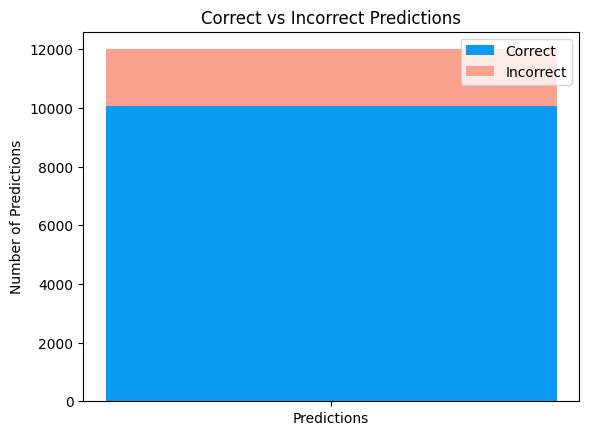

In [45]:

# Creating training and testing sets
X = df_new_copy.drop('RainTomorrow', axis=1)
y = df_new_copy['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-----
#Scaling data using StandardScale;
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# creating polynomial features:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print("Accuracy of model (accuracy_score):", accuracy_score(y_test, y_pred))

# These lines of code count and sort into correct and incorrect predictions, aswell as storing them into variable that will be used to plot them
labels = ['Predictions']
correct_vals = [np.sum(y_test == y_pred)]
incorrect_vals = [np.sum(y_test != y_pred)]

# Plot (Stacked bar graph)
fig, ax = plt.subplots()
ax.bar(labels, correct_vals, label='Correct', color='#0B9BF4')
ax.bar(labels, incorrect_vals, bottom=correct_vals, label='Incorrect', color='#FAA18F')
ax.set_ylabel('Number of Predictions')
ax.set_title('Correct vs Incorrect Predictions')
ax.legend()

plt.show()



##Model Number 2

In [55]:
final_selectedC = ['Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'RainToday', 'RainTomorrow']


# New df ( one that will be used to train models)
df_final= df[['Cloud3pm', 'Humidity3pm','Pressure9am', 'MinTemp', 'RainToday','RainTomorrow']].copy()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59980 entries, 0 to 59979
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cloud3pm      59980 non-null  float64
 1   Humidity3pm   59980 non-null  float64
 2   Pressure9am   59980 non-null  float64
 3   MinTemp       59980 non-null  float64
 4   RainToday     59980 non-null  float64
 5   RainTomorrow  59980 non-null  float64
dtypes: float64(6)
memory usage: 2.7 MB


In [ ]:
# Creating training and testing sets
X = df_new_copy.drop('RainTomorrow', axis=1)
y = df_new_copy['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-----
#Scaling data using StandardScale;
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# creating polynomial features:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print("Accuracy of model (accuracy_score):", accuracy_score(y_test, y_pred))